# Data Preprocessing


<img src="https://github.com/awantik/machine-learning-slides/blob/master/ML-Pipeline.png?raw=true">

## Agenda
1. Introduction to Preprocessing
2. StandardScaler
3. MinMaxScaler
4. RobustScaler
5. Normalization
6. Binarization
7. Encoding Categorical (Ordinal & Nominal) Features
8. Imputation
9. Polynomial Features
10. Custom Transformer
11. Text Processing
12. CountVectorizer
13. TfIdf
14. HashingVectorizer
15. Image using skimage

#### Common import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Introduction to PreProcessing
* Learning algorithms have affinity towards certain pattern of data.
* Unscaled or unstandardized data have might have unacceptable prediction
* Learning algorithms understands only number, converting text image to number is required
* Preprocessing refers to transformation before feeding to machine learning


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp5.PNG?raw=true">


## 2. StandardScaler

Standardization is a preprocessing method used to transform continuous data to make it look normally distributed.

In scikit-learn, this is often a necessary step, because many models assume that the data you are training on is normally distributed, and if it isn't, you risk biasing your model. 

* The StandardScaler assumes your data is normally distributed (continuous numerical data) within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
* Calculate - Subtract mean of column & div by standard deviation



<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp4.PNG?raw=true">

When to standardize:
* Models in linear space
* Dataset features have high variance 
* If data is not normally distributed, this is not the best scaler to use.

In [3]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [4]:
df.head(10)

,x1,x2,x3
0,-0.318579,5.968882,-13.066138
1,-0.111337,4.734367,-2.998872
2,-2.889999,6.482513,-5.851488
3,-1.546319,-0.227328,-6.915221
4,-1.967241,5.969714,-9.435323
5,3.585199,8.630340,-10.304413
6,-1.198456,6.470573,-5.090511
7,0.559895,7.294589,-13.990164
8,-0.150677,-0.165398,-4.673638
9,1.866584,8.149341,-7.101921


<AxesSubplot:ylabel='Density'>

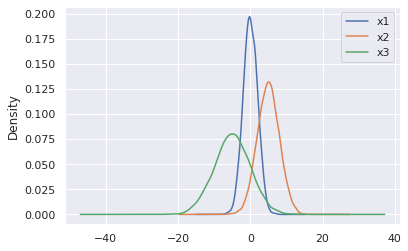

In [48]:
# plotting data
df.plot.kde()

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [6]:
data_tf = ss.fit_transform(df)

In [7]:
df = pd.DataFrame(data_tf, columns=['t1','t2','t3'])

In [9]:
df.head(10)

,t1,t2,t3
0,-0.171678,0.331069,-1.624461
1,-0.068284,-0.081865,0.406790
2,-1.454582,0.502874,-0.168776
3,-0.784208,-1.741506,-0.383403
4,-0.994210,0.331347,-0.891879
5,1.775949,1.221302,-1.067233
6,-0.610656,0.498880,-0.015236
7,0.266600,0.774506,-1.810899
8,-0.087911,-1.720791,0.068876
9,0.918518,1.060413,-0.421073


<AxesSubplot:ylabel='Density'>

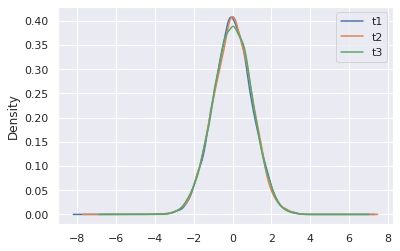

In [8]:
df.plot.kde()

## 3. MinMaxScaler
* One of the most popular
* Calculate - Subtract min of column & div by difference between max & min




<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp3.PNG?raw=true">



* Data shifts between 0 & 1
* If distribution not suitable for StandardScaler, this scaler works out.
* Sensitive to outliers

In [17]:
df = pd.DataFrame({
    # positive skew
    'col1': np.random.chisquare(8, 1000),
    # negative skew 
    'col2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'col3': np.random.normal(50, 3, 1000)
})

In [18]:
df.head(10)

,col1,col2,col3
0,12.351964,34.066129,58.274421
1,12.133952,29.344088,51.117110
2,7.349188,35.247671,47.893679
3,13.539660,36.217660,48.070512
4,2.291195,28.926177,49.146308
5,4.177078,36.439333,50.004868
6,7.342841,30.296432,48.028155
7,7.357738,28.323430,44.932588
8,1.734299,30.687835,53.227381
9,18.428924,26.645159,49.172190


<AxesSubplot:ylabel='Density'>

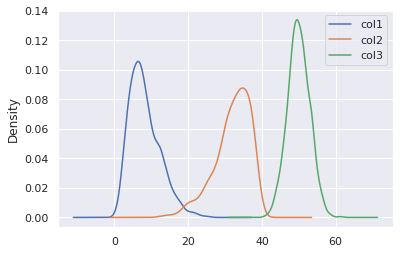

In [19]:
df.plot.kde()

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
mm = MinMaxScaler()
data_tf = mm.fit_transform(df)

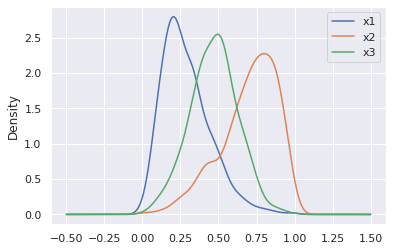

In [ ]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

## 4. Robust Scaler
* Suited for data with outliers
* Calculate by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile






<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp2.PNG?raw=true">

In [15]:
df1 = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

In [16]:
df.head(10)

,x1,x2
0,0.038495,-1.294781
1,0.062674,0.077922
2,0.987793,-0.236351
3,0.150746,0.465166
4,1.212100,0.983355
5,0.503612,0.672384
6,-0.381674,-1.550263
7,-0.071554,-0.649912
8,1.104820,0.352975
9,-0.834341,1.684240


<AxesSubplot:ylabel='Density'>

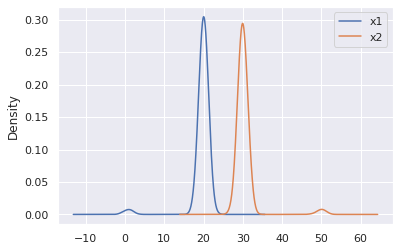

In [17]:
df1.plot.kde()

In [19]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

In [20]:
data_tf = rs.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

In [21]:
df.head(10)

,x1,x2
0,0.038495,-1.294781
1,0.062674,0.077922
2,0.987793,-0.236351
3,0.150746,0.465166
4,1.212100,0.983355
5,0.503612,0.672384
6,-0.381674,-1.550263
7,-0.071554,-0.649912
8,1.104820,0.352975
9,-0.834341,1.684240


In [22]:
df1.head(10)

,x1,x2
0,19.268162,29.091913
1,19.998503,29.385363
2,21.034028,30.654396
3,19.637653,30.563149
4,19.959571,28.921221
5,21.701300,30.144209
6,18.938775,30.440343
7,21.148291,29.802594
8,20.582604,30.970237
9,20.215218,30.065402


<AxesSubplot:ylabel='Density'>

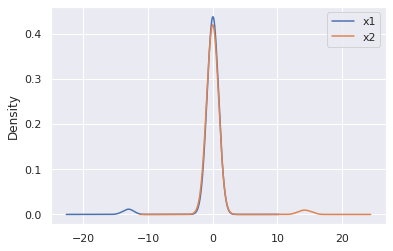

In [23]:
df.plot.kde()

## 5. Normalizer
* Each parameter value is obtained by dividing by magnitude


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp1.PNG?raw=true">
* Centralizes data to origin 

In [25]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

In [26]:
df.head(10)

,x1,y1,z1
0,65.0,42.0,59.0
1,-78.0,-34.0,8.0
2,76.0,66.0,139.0
3,79.0,76.0,70.0
4,78.0,-41.0,-70.0
5,21.0,42.0,38.0
6,-41.0,-79.0,-46.0
7,-22.0,-29.0,118.0
8,-13.0,-64.0,50.0
9,-49.0,2.0,4.0


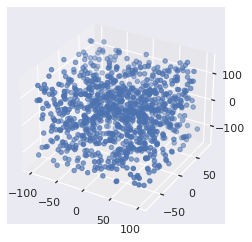

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [ ]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

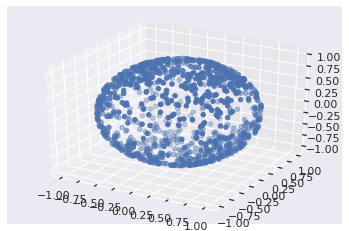

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

## 6. Binarization
* Thresholding numerical values to binary values ( 0 or 1 )
* A few learning algorithms assume data to be in Bernoulli distribution - Bernoulli's Naive Bayes

In [28]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  -2.],
              [ 0.,  1., -1.]])

In [29]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [30]:
data_tf = binarizer.fit_transform(X)

In [31]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## 7. Encoding Categorical Values 
#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [ ]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [ ]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [ ]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### PS: We can use transformer class for this as well, we will see that later

#### Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [18]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Female']})

In [19]:
df

,Age,Gender
0,33,Male
1,44,Female
2,22,Male
3,44,Female
4,55,Male
5,22,Female


In [13]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [15]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [16]:
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Female,0


In [ ]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## 8. Imputation
* Missing values cannot be processed by learning algorithms
* Imputers can be used to infer value of missing data from existing data

In [ ]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
imputer.fit_transform(df)

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 1. ],
       [4. , 3.4],
       [3.4, 4. ],
       [7. , 5. ]])

## 9. Polynomial Features
* Deriving non-linear feature by coverting data into higher degree
* Used with polynomial regression to learn model of higher degree

In [ ]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)

In [ ]:
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

## 10. Custom Transformer 
* Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing.
* FunctionTransformer is used to create one Transformer 
* validate = False, is required for string columns

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [ ]:
customtransformer = FunctionTransformer(mapping, validate=False)

In [ ]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [ ]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4


## 11. Text Processing
* Perhaps one of the most common information
* Learning algorithms don't understand text but only numbers
* Below menthods convert text to numbers

## 12. CountVectorizer
* Each column represents one word, count refers to frequency of the word
* Sequence of words are not maintained

#### Hyperparameters
* n_grams - Number of words considered for each column
* stop_words - words not considered
* vocabulary - only words considered


In [ ]:
corpus = [
     'This is the first document awesome food.',
     'This is the second second document.',
     'And the third one the is mission impossible.',
     'Is this the first document?',
]
df = pd.DataFrame({'Text':corpus})
df

,Text
0,This is the first document awesome food.
1,This is the second second document.
2,And the third one the is mission impossible.
3,Is this the first document?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1]])

In [ ]:
cv.vocabulary_

{'and': 0,
 'awesome': 1,
 'document': 2,
 'first': 3,
 'food': 4,
 'impossible': 5,
 'is': 6,
 'mission': 7,
 'one': 8,
 'second': 9,
 'the': 10,
 'third': 11,
 'this': 12}

In [ ]:
cv = CountVectorizer(stop_words=['the','is'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1],
       [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]])

In [ ]:
cv.vocabulary_

{'and': 0,
 'awesome': 1,
 'document': 2,
 'first': 3,
 'food': 4,
 'impossible': 5,
 'mission': 6,
 'one': 7,
 'second': 8,
 'third': 9,
 'this': 10}

In [ ]:
cv = CountVectorizer(vocabulary=['mission','food','second'])
cv.fit_transform(df.Text).toarray()

array([[0, 1, 0],
       [0, 0, 2],
       [1, 0, 0],
       [0, 0, 0]])

In [ ]:
cv = CountVectorizer(ngram_range=[1,2])
cv.fit_transform(df.Text).toarray()

array([[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1]])

In [ ]:
cv.vocabulary_

{'and': 0,
 'and the': 1,
 'awesome': 2,
 'awesome food': 3,
 'document': 4,
 'document awesome': 5,
 'first': 6,
 'first document': 7,
 'food': 8,
 'impossible': 9,
 'is': 10,
 'is mission': 11,
 'is the': 12,
 'is this': 13,
 'mission': 14,
 'mission impossible': 15,
 'one': 16,
 'one the': 17,
 'second': 18,
 'second document': 19,
 'second second': 20,
 'the': 21,
 'the first': 22,
 'the is': 23,
 'the second': 24,
 'the third': 25,
 'third': 26,
 'third one': 27,
 'this': 28,
 'this is': 29,
 'this the': 30}

## 13. TfId fVectorizer
TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.

* Words occuring more frequently in a doc versus entire corpus is considered more important
* The importance is in scale of 0 & 1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
vectorizer.fit_transform(df.Text).toarray()

array([[0.64450299, 0.41137791, 0.64450299, 0.        , 0.        ,
        0.        ],
       [0.        , 0.30403549, 0.        , 0.        , 0.        ,
        0.9526607 ],
       [0.        , 0.        , 0.        , 0.70710678, 0.70710678,
        0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [ ]:
vectorizer.get_feature_names()

['awesome', 'document', 'food', 'impossible', 'mission', 'second']

## 14. HashingVectorizer
* All above techniques converts data into table where each word is converted to column
* Learning on data with millions of columns is difficult to process
* HashingVectorizer is an useful technique for out-of-core learning
* Multiple words are hashed to limited column
* Limitation - Hashed value to word mapping is not possible

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=5)

In [ ]:
hv.fit_transform(df.Text).toarray()

array([[ 0.        , -0.37796447,  0.75592895, -0.37796447,  0.37796447],
       [ 0.81649658,  0.        ,  0.40824829, -0.40824829,  0.        ],
       [-0.31622777,  0.        ,  0.31622777, -0.63245553, -0.63245553],
       [ 0.        , -0.57735027,  0.57735027, -0.57735027,  0.        ]])

## 15. Image Processing using skimage
* skimage doesn't come with anaconda. install with 'pip install skimage'
* Images should be converted from 0-255 scale to 0-1 scale.
* skimage takes image path & returns numpy array
* images consist of 3 dimension


In [ ]:
from skimage.io import imread,imshow

In [ ]:
image = imread('/content/google-css-images-1515761601.jpg')

In [ ]:
image.shape  #height, width, colors range

(317, 640, 3)

In [ ]:
image[0]

array([[51, 51, 51],
       [51, 51, 51],
       [51, 51, 51],
       ...,
       [51, 51, 51],
       [51, 51, 51],
       [51, 51, 51]], dtype=uint8)

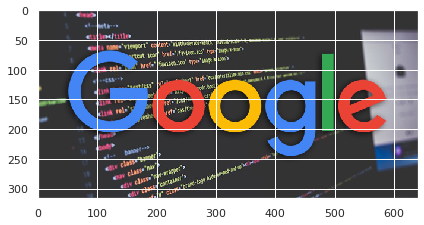

In [ ]:
imshow(image)

In [ ]:
from skimage.color import rgb2gray

In [ ]:
rgb2gray(image).shape

(317, 640)

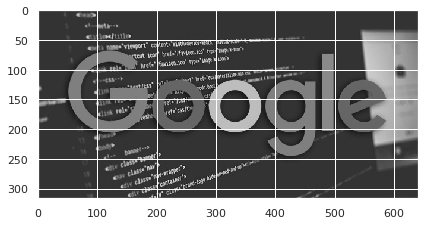

In [ ]:
imshow(rgb2gray(image))

In [ ]:
from skimage.transform import resize

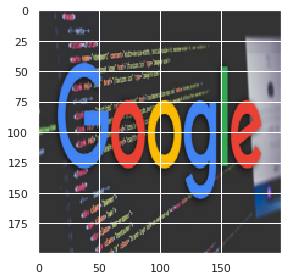

In [ ]:
imshow(resize(image, (200,200)))